In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('../data/superstore.xls')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
sales_mean = df.groupby('Sub-Category')[['Sales']].mean()

In [14]:
sales_mean.rename({'Sales': 'SubcatAvg'}, axis=1, inplace=True)

In [17]:
sales_mean.columns

Index(['SubcatAvg'], dtype='object')

In [19]:
df = df.merge(sales_mean, left_on='Sub-Category', right_index=True)

In [22]:
df['PercentDiff'] = (df['Sales'] - df['SubcatAvg']) / df['SubcatAvg']

In [25]:
cust_avgs = df.groupby('Customer Name')['PercentDiff'].mean() * 100

In [27]:
cust_avgs.sort_values(ascending=False)

Customer Name
Mitch Willingham        672.210825
Christopher Martinez    555.127205
Jenna Caffey            535.085743
Andy Reiter             396.344151
Adrian Barton           396.321356
                           ...    
Lela Donovan            -84.431519
Susan Gilcrest          -84.973073
Cari Schnelling         -85.288547
Mitch Gastineau         -91.917354
Thais Sissman           -98.190708
Name: PercentDiff, Length: 793, dtype: float64

In [28]:
df['Sales']

0        261.9600
27      3083.4300
38       532.3992
189      899.1360
192      626.3520
          ...    
8820     959.9840
8990    4899.9300
9617     899.9820
9839     479.9760
9929    2799.9600
Name: Sales, Length: 9994, dtype: float64

In [31]:
profit_mean = df.groupby('Sub-Category')[['Profit']].mean().rename({
    'Profit': 'ProfitAvg'
}, axis=1)

In [32]:
profit_mean

,ProfitAvg
Sub-Category,
Accessories,54.111788
Appliances,38.922758
Art,8.200737
Binders,19.843574
Bookcases,-15.230509
Chairs,43.095894
Copiers,817.909190
Envelopes,27.418019
Fasteners,4.375660


In [34]:
df = pd.merge(df, profit_mean, left_on='Sub-Category', right_index=True)

In [36]:
df['ProfitDiff'] = (df['Profit'] - df['ProfitAvg']) / df['ProfitAvg']

In [40]:
customer_profit = df.groupby('Customer Name')['ProfitDiff'].mean()

In [42]:
customer_profit.sort_values(ascending=False)

Customer Name
Mitch Willingham        24.040565
Christopher Martinez    18.624369
Jim Radford             16.282799
Andy Reiter             13.739836
Adrian Barton           13.378266
                          ...    
Luke Foster            -12.429651
Paul Knutson           -13.896034
Sharelle Roach         -13.952712
Grant Thornton         -21.260862
Cindy Stewart          -26.713990
Name: ProfitDiff, Length: 793, dtype: float64

In [43]:
stocks = pd.read_csv('../data/stocks.csv', )

In [44]:
stocks.head()

,Date,AAPL,GOOGL,FB,MSFT,AMZN
0,2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
1,2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2,2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
3,2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
4,2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [45]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [47]:
stocks = stocks.set_index('Date')

In [48]:
stocks.head()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [50]:
stocks.diff(4)

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,NaN,NaN,NaN,NaN,NaN
2014-11-07,NaN,NaN,NaN,NaN,NaN
2014-11-10,NaN,NaN,NaN,NaN,NaN
2014-11-11,0.839996,5.339966,-0.220001,1.009998,15.490021
...,...,...,...,...,...
2019-10-28,9.089996,47.780029,7.059998,7.820007,11.349976
2019-10-29,0.110000,3.030029,3.160004,5.589997,0.539917
2019-10-30,-0.320007,1.589966,1.869995,4.669999,-0.790039


In [54]:
aapl_quarterly = stocks[['AAPL']].resample('M').last()

In [56]:
aapl_quarterly.diff()

,AAPL
Date,
2014-11-30,NaN
2014-12-31,-8.550003
2015-01-31,6.780007
2015-02-28,11.300003
2015-03-31,-4.030007
...,...
2019-07-31,15.119995
2019-08-31,-4.299988
2019-09-30,15.229996


In [57]:
aapl_quarterly['QuarterlyDiff'] = aapl_quarterly['AAPL'].diff(4)

In [58]:
aapl_quarterly

,AAPL,QuarterlyDiff
Date,,
2014-11-30,118.930000,NaN
2014-12-31,110.379997,-8.550003
2015-01-31,117.160004,6.780007
2015-02-28,128.460007,11.300003
2015-03-31,124.430000,-4.030007
...,...,...
2019-07-31,213.039993,15.119995
2019-08-31,208.740005,-4.299988
2019-09-30,223.970001,15.229996


In [59]:
aapl_quarterly['AnnualDiff'] = aapl_quarterly['AAPL'].diff(4)

In [60]:
aapl_quarterly

,AAPL,QuarterlyDiff,AnnualDiff
Date,,,
2014-11-30,118.930000,NaN,NaN
2014-12-31,110.379997,-8.550003,NaN
2015-01-31,117.160004,6.780007,NaN
2015-02-28,128.460007,11.300003,NaN
2015-03-31,124.430000,-4.030007,5.500000
...,...,...,...
2019-07-31,213.039993,15.119995,23.089996
2019-08-31,208.740005,-4.299988,8.070007
2019-09-30,223.970001,15.229996,48.899994


In [62]:
stocks.shift()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-07,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-10,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-11,108.830002,558.229980,75.000000,48.889999,305.109985
...,...,...,...,...,...
2019-10-28,246.580002,1264.300049,187.889999,140.729996,1761.329956
2019-10-29,249.050003,1288.979980,189.399994,144.190002,1777.079956
2019-10-30,243.289993,1260.660034,189.309998,142.830002,1762.709961


In [66]:
aapl_quarterly['Last'] = aapl_quarterly['AAPL'].shift()

In [67]:
aapl_quarterly

,AAPL,QuarterlyDiff,AnnualDiff,Last
Date,,,,
2014-11-30,118.930000,NaN,NaN,NaN
2014-12-31,110.379997,-8.550003,NaN,118.930000
2015-01-31,117.160004,6.780007,NaN,110.379997
2015-02-28,128.460007,11.300003,NaN,117.160004
2015-03-31,124.430000,-4.030007,5.500000,128.460007
...,...,...,...,...
2019-07-31,213.039993,15.119995,23.089996,197.919998
2019-08-31,208.740005,-4.299988,8.070007,213.039993
2019-09-30,223.970001,15.229996,48.899994,208.740005


In [74]:
(stocks  / stocks.shift()).head()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,0.998530,0.992337,1.005746,1.017551,1.000405
2014-11-07,1.002852,1.000236,1.004518,0.999589,1.010855
2014-11-10,0.998349,1.011616,0.992064,1.004314,1.017508
2014-11-11,1.007994,1.005482,0.994800,0.999591,1.022615


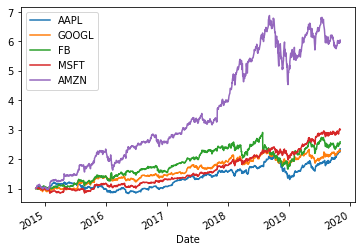

In [76]:
((stocks  / stocks.shift()).cumprod()).plot()

In [78]:
stocks.index.strftime('%Y-%d-%m')

Index(['2014-05-11', '2014-06-11', '2014-07-11', '2014-10-11', '2014-11-11',
       '2014-12-11', '2014-13-11', '2014-14-11', '2014-17-11', '2014-18-11',
       ...
       '2019-21-10', '2019-22-10', '2019-23-10', '2019-24-10', '2019-25-10',
       '2019-28-10', '2019-29-10', '2019-30-10', '2019-31-10', '2019-01-11'],
      dtype='object', name='Date', length=1257)

In [79]:
stocks.pct_change()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,-0.001470,-0.007663,0.005746,0.017551,0.000405
2014-11-07,0.002852,0.000236,0.004518,-0.000411,0.010855
2014-11-10,-0.001651,0.011616,-0.007936,0.004314,0.017508
2014-11-11,0.007994,0.005482,-0.005200,-0.000409,0.022615
...,...,...,...,...,...
2019-10-28,0.010017,0.019521,0.008037,0.024586,0.008942
2019-10-29,-0.023128,-0.021971,-0.000475,-0.009432,-0.008086
2019-10-30,-0.000123,0.000032,-0.005599,0.012462,0.009803


In [81]:
(stocks / stocks.shift()) - 1

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,-0.001470,-0.007663,0.005746,0.017551,0.000405
2014-11-07,0.002852,0.000236,0.004518,-0.000411,0.010855
2014-11-10,-0.001651,0.011616,-0.007936,0.004314,0.017508
2014-11-11,0.007994,0.005482,-0.005200,-0.000409,0.022615
...,...,...,...,...,...
2019-10-28,0.010017,0.019521,0.008037,0.024586,0.008942
2019-10-29,-0.023128,-0.021971,-0.000475,-0.009432,-0.008086
2019-10-30,-0.000123,0.000032,-0.005599,0.012462,0.009803


In [90]:
one_week = pd.DateOffset(weeks=1)

In [83]:
one_month

<DateOffset: months=1>

In [87]:
stocks.index - one_month

DatetimeIndex(['2014-10-22', '2014-10-23', '2014-10-24', '2014-10-27',
               '2014-10-28', '2014-10-29', '2014-10-30', '2014-10-31',
               '2014-11-03', '2014-11-04',
               ...
               '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10',
               '2019-10-11', '2019-10-14', '2019-10-15', '2019-10-16',
               '2019-10-17', '2019-10-18'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [98]:
week_ago_prices = stocks.shift(1, freq=one_week).reindex(stocks.index)

In [96]:
stocks / stocks.shift(1, freq=one_week)

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,NaN,NaN,NaN,NaN,NaN
2014-11-07,NaN,NaN,NaN,NaN,NaN
2014-11-10,NaN,NaN,NaN,NaN,NaN
2014-11-11,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-11-04,NaN,NaN,NaN,NaN,NaN
2019-11-05,NaN,NaN,NaN,NaN,NaN
2019-11-06,NaN,NaN,NaN,NaN,NaN


In [101]:
(stocks / week_ago_prices).mean()

AAPL     1.003777
GOOGL    1.003476
FB       1.004117
MSFT     1.004387
AMZN     1.007331
dtype: float64

In [110]:
stocks[stocks.index.year == 2019]['AMZN'].resample('M').last().pct_change().mean()

0.005647495071858233

In [111]:
one_month = pd.DateOffset(months=1)

In [116]:
one_month_stocks = stocks.shift(1, freq=one_month)

In [119]:
one_month_stocks.index = stocks.index

In [121]:
stocks.head()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [133]:
one_month_stocks = stocks.shift(1, freq=one_month)

In [139]:
one_month_stocks = one_month_stocks[~one_month_stocks.index.duplicated()].copy()

In [148]:
one_month_stocks = one_month_stocks.reindex(stocks.index)

In [152]:
monthly_growth = (stocks / one_month_stocks) - 1

In [156]:
monthly_growth[monthly_growth.index.year == 2019]['AMZN'].mean()

0.01512501104735679

In [157]:
stocks.head()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [179]:
panel_data = pd.read_csv('../data/stocks_panel.csv', parse_dates=['Date'])

In [184]:
panel_data = panel_data.set_index(['Stock', 'Date']).sort_index(level=0)

In [164]:
panel_data = panel_data.set_index(['Stock', 'Date']).sort_index(level=0)

In [171]:
panel_data['Price'].shift(level=0)

TypeError: shift() got an unexpected keyword argument 'level'

In [175]:
panel_data.groupby(level=0)['Price'].shift(4).loc['MSFT']

Date
2014-11-05           NaN
2014-11-06           NaN
2014-11-07           NaN
2014-11-10           NaN
2014-11-11     47.860001
                 ...    
2019-10-28    136.369995
2019-10-29    137.240005
2019-10-30    139.940002
2019-10-31    140.729996
2019-11-01    144.190002
Name: Price, Length: 1257, dtype: float64

In [177]:
panel_data['Price'].shift(4).loc['MSFT']

Date
2014-11-05    1260.660034
2014-11-06    1260.699951
2014-11-07    1258.800049
2014-11-10    1272.250000
2014-11-11      47.860001
                 ...     
2019-10-28     136.369995
2019-10-29     137.240005
2019-10-30     139.940002
2019-10-31     140.729996
2019-11-01     144.190002
Name: Price, Length: 1257, dtype: float64

In [178]:
panel_data

Price
Stock Date                  
AAPL  2014-11-05  108.860001
      2014-11-06  108.699997
      2014-11-07  109.010002
      2014-11-10  108.830002
      2014-11-11  109.699997
...                      ...
MSFT  2019-10-28  144.190002
      2019-10-29  142.830002
      2019-10-30  144.610001
      2019-10-31  143.369995
      2019-11-01  143.720001

[6285 rows x 1 columns]

In [190]:
panel_data.index.get_level_values(level=1).is_month_end

array([False, False, False, ..., False,  True, False])

In [196]:
panel_data['Quarter'] = panel_data.index.get_level_values(level=1).quarter

In [197]:
panel_data.head()

Price  Quarter  MonthEnd
Stock Date                                     
AAPL  2014-11-05  108.860001        4     False
      2014-11-06  108.699997        4     False
      2014-11-07  109.010002        4     False
      2014-11-10  108.830002        4     False
      2014-11-11  109.699997        4     False

In [193]:
panel_data['MonthEnd']  = panel_data.index.get_level_values(level=1).is_month_end

In [194]:
panel_data

Price  Quarter  MonthEnd
Stock Date                                     
AAPL  2014-11-05  108.860001    False     False
      2014-11-06  108.699997    False     False
      2014-11-07  109.010002    False     False
      2014-11-10  108.830002    False     False
      2014-11-11  109.699997    False     False
...                      ...      ...       ...
MSFT  2019-10-28  144.190002    False     False
      2019-10-29  142.830002    False     False
      2019-10-30  144.610001    False     False
      2019-10-31  143.369995     True      True
      2019-11-01  143.720001    False     False

[6285 rows x 3 columns]

In [199]:
panel_data['1D'] = panel_data.groupby(level=0)['Price'].shift()

In [200]:
panel_data['2D'] = panel_data.groupby(level=0)['Price'].shift(2)

In [202]:
panel_data.head()

Price  Quarter  MonthEnd          1D          2D
Stock Date                                                             
AAPL  2014-11-05  108.860001        4     False         NaN         NaN
      2014-11-06  108.699997        4     False  108.860001         NaN
      2014-11-07  109.010002        4     False  108.699997  108.860001
      2014-11-10  108.830002        4     False  109.010002  108.699997
      2014-11-11  109.699997        4     False  108.830002  109.010002